1.0


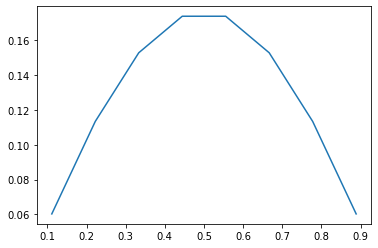

In [94]:
import matplotlib.pyplot as plt
import math
import numpy as np
from qiskit.circuit.library import NormalDistribution
from math import pi
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer
from qiskit.visualization import plot_histogram

#Preparing the sine-shaped histogram that will be used in the initialisation
L = 1
n = 1
x = np.linspace(0,L, num=10)
storage_for_normalisation = []

x = np.delete(xold,[0,9])

Normalisation_wavefunction = (np.sqrt(2/L)*(np.sin(n*pi*x/L)))

Normalisation_Constant = np.sum(Normalisation_wavefunction)

waveFunction = (math.sqrt(2/L)*np.sin(n*math.pi*x/L)/(Normalisation_Constant))

print(np.sum(waveFunction))

plt.plot(x,(waveFunction))
plt.show()

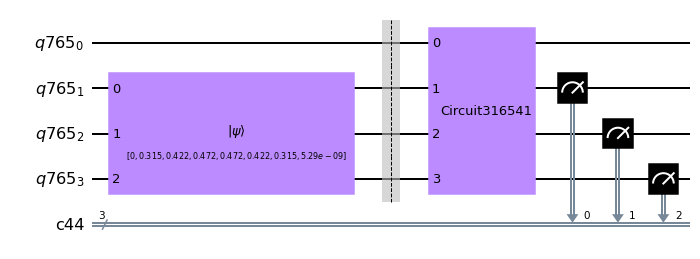

In [92]:


#n = 6 #number of qubits not including ancilla
phi = 0
V=0

q = QuantumRegister(4)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)

tev = QuantumCircuit(q)

#Initialisation


#################################################################################################################


qc.initialize(np.sqrt(waveFunction), [q[1],q[2],q[3]])
#qc.initialize([0,0,0.5,0.5,0.5,0.5,0,0],[q[1],q[2],q[3]])

#qc2.initialize(histnorm, [q[1],q[2],q[3]])



#######################################################################################################################



#qc.initialize(amplitude, [q[1],q[2],q[3],q[4],q[5],q[6]])
#qc2.initialize(amplitude, [q[1],q[2],q[3],q[4],q[5],q[6]])

#Attempt at Gaussian Curve

#gauss = =1/(math.sqrt(2*(15)))*math.exp(-0.5*x^2)




qc.barrier()

#Potential


tev.p(V*phi*4/np.sqrt(8), 3)
tev.p(V*phi*2/np.sqrt(8), 2)
tev.p(V*phi/np.sqrt(8), 1)



#tev.barrier()

#QFT

tev.h(1); tev.cp(pi/2,2,1); tev.cp(pi/4,3,1)
tev.h(2); tev.cp(pi/2,3,2)
tev.h(3)
tev.x(3)

qc.append(tev, [0,1,2,3])


qc.measure(1,0)
qc.measure(2,1)
qc.measure(3,2)
    
#qc.swap(1,3)

#tev.barrier()
'''


#Time Step
tev.p(phi,3)
tev.p(phi/2,2)
tev.p(phi/4,1)


tev.cx(3,0); tev.cx(2,0)
tev.p(phi*2,0)
tev.cx(2,0); tev.cx(3,0)


tev.cx(3,0); tev.cx(1,0)
tev.p(phi,0)
tev.cx(1,0); tev.cx(3,0)



#qc.cx(3,0); qc.cx(2,0); qc.cx(1,0)
#qc.p(2*phi,0)
#qc.cx(1,0); qc.cx(2,0); qc.cx(3,0)

tev.cx(2,0); tev.cx(1,0)
tev.p(phi/2,0)
tev.cx(1,0); tev.cx(2,0)




#tev.barrier()




#Inverse QFT

tev.x(3)
tev.h(3)
tev.cp(-pi/2,3,2); tev.h(2)
tev.cp(-pi/2,2,1); tev.cp(-pi/4,3,1); tev.h(1)

#qc.swap(1,3)



Time = tev.to_gate()

s = 0

for s in range(1):
    qc.append(tev, [0,1,2,3])

#tev.barrier()


#Measurement

#qc.measure(1,0)
#qc.measure(2,1)
#qc.measure(3,2)
    

'''


qc.draw('mpl')


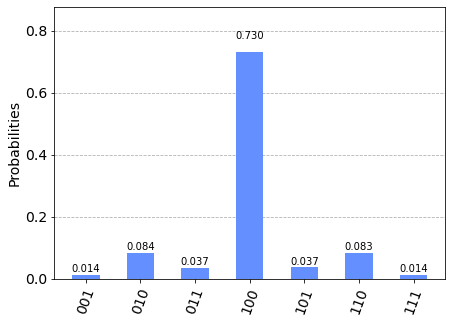

In [93]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 65536
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)
